## $\color{darkcyan}{\text{IMPORTING LIBRARIES}}$ 

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt

## $\color{darkcyan}{\text{IMPORTING THE DATASETS}}$ 

In [44]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/fall21/diabetic_data.csv"
#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.

csvdata=requests.get(urlds,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [45]:
#Storing the diabetes data into the "data" dataframe
data=pd.read_csv(StringIO(csvdata))  #getting the data into a pandas dataframe

In [46]:
#Storing the data wherein the mapping is shown into the dataframe "id_mappings"
id_mappings = pd.read_csv('IDs_mapping.csv')

 ## $\color{darkcyan}{\text{UNDERSTANDING THE DATA}}$ 

In [47]:
#Viewing the "data" dataframe
data.head() #the first 5 rows of the dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [48]:
#Viewing the "id_mappings" dataframe
id_mappings.head() #displays the first 5 rows

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


$\color{darkcyan}{\text{Admission type id, Discharge Disposition Id, Admission Source ID are the major categorical columns present in the dataset, It is because they give us information about the patient's health when they arrived in the hospital, on what basis they were admitted because a person to be admitted becomes a patient when it falls under some category put by the hospital. Also the condition of the patient upon which they were discharged from the hospital.}}$ 

In [49]:
grp_2=data.groupby(['admission_type_id','discharge_disposition_id','admission_source_id']).number_diagnoses.sum()
grp_2.head()
#This gives us a grouping of each admission_type_id and the discharge_disposition_id along with the sum of the 
#admission_source_id

admission_type_id  discharge_disposition_id  admission_source_id
1                  1                         1                      7167
                                             2                      1028
                                             3                       112
                                             4                       908
                                             5                       124
Name: number_diagnoses, dtype: int64

In [50]:
data.info()
#Using the info() function we get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

$\color{brown}{\text{Gives us the different unique values of every column in the dataset}}$

In [51]:
for col in data:
    print(col)
    print(data[col].unique())
    print('\n')

encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]


patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]


race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender
['Female' 'Male' 'Unknown/Invalid']


age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id
[6 1 2 3 4 5 8 7]


discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


medical_specialty
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surger

## $\color{darkcyan}{\text{DATA CLEANING}}$ 

$\color{brown}{\text{The Dataset we received had an abundance of empty values signified as '?'.Converting the '?' in the dataframe to a NA to get uniformity in the dataset so it is easier to clean the NA values}}$

In [52]:
data =  data.replace('?',np.nan)

We can see the number of NA values in each dataset

In [53]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Now since every column has a unique meaning, we prefer to remove the NA values in a friendly way, for some columns  like race,medical speciality,diagnosis1,diagnosis2,diagnosis3 the  ? which were converted to NA can have significant meaning with the data . Thus we would not remove the entries, ie the rows in which ? is present for the above mentioned columns. Here we are filling all the NA values with 'Unknown'

In [54]:
#Converting NAs to 'Unknown' categories
data['race'] = data['race'].replace(np.nan,'Unknown')

In [55]:
data['payer_code'] = data['payer_code'].fillna('Unknown')
data['medical_specialty'] = data['medical_specialty'].fillna('Unknown')
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

Now Weight is a different issue because there are around 97% of missing values in the 'weight' column, we drop the column from the dataframe

In [56]:
data = data.drop('weight', 1)

/tmp/ipykernel_55/821518313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('weight', 1)


Here we are rechecking the data to verify that all NA values have been handled.

In [57]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

## $\color{darkcyan}{\text{DATA TRANSFORMATION}}$ 

creating a copy of the dataset into a new dataframe called 'newData'

In [58]:
newData= data.copy()


We had a second csv file where there were meanings and explanation for the important categories discharge_id, admission_id,admission_source_id. But it was not a good format CSV file thus we created dictionary variables for all three of them. Then we used the REPLACE function which replaced the correspondings IDs value present with the corresponding explanation referencing the dictionary variable mentioned. The dictionary objects used below are discharge_description,admission_description,admission_source_description.

In [59]:
discharge_description ={
1:	 'Discharged to home',2:	 'Discharged/transferred to another short term hospital',3:	 'Discharged/transferred to SNF',4:	 'Discharged/transferred to ICF',5:	 'Discharged/transferred to another type of inpatient care institution',6:	 'Discharged/transferred to home with home health service',7:	 'Left AMA',8:	 'Discharged/transferred to home under care of Home IV provider',9:	 'Admitted as an inpatient to this hospital',10:	 'Neonate discharged to another hospital for neonatal aftercare',11:	 'Expired',12:	 'Still patient or expected to return for outpatient services',13:	 'Hospice / home',14:	 'Hospice / medical facility',15:	 'Discharged/transferred within this institution to Medicare approved swing bed',16:	 'Discharged/transferred/referred another institution for outpatient services',17:	 'Discharged/transferred/referred to this institution for outpatient services',18:	 'NULL',19:	 'Expired at home. Medicaid only, hospice.',20:	 'Expired in a medical facility. Medicaid only, hospice.',21:	 'Expired, place unknown. Medicaid only, hospice.',22:	 'Discharged/transferred to another rehab fac including rehab units of a hospital .',23:	 'Discharged/transferred to a long term care hospital.',24:	 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',25:	 'Not Mapped',26:	 'Unknown/Invalid',30:	 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',27:	 'Discharged/transferred to a federal health care facility.',28:	 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',29:	 'Discharged/transferred to a Critical Access Hospital (CAH).'}
#The different categories of 'discharge_disposition_id'

In [60]:
newData['discharge_disposition_id'].replace(discharge_description,inplace=True)
#Mapping discharge_description to it's particular category

We read the unique values which were replaced in the discharge disposition id to comprehend the meaning of the data

In [61]:
newData['discharge_disposition_id'].unique()
#Viewing the 24 unique categories of 'discharge_disposition_id'

array(['Not Mapped', 'Discharged to home',
       'Discharged/transferred to SNF',
       'Discharged/transferred to home with home health service',
       'Discharged/transferred to another short term hospital',
       'Discharged/transferred to another type of inpatient care institution',
       'Expired', 'Left AMA',
       'Neonate discharged to another hospital for neonatal aftercare',
       'Discharged/transferred to ICF', 'Hospice / medical facility',
       'NULL',
       'Discharged/transferred to home under care of Home IV provider',
       'Hospice / home',
       'Still patient or expected to return for outpatient services',
       'Discharged/transferred/referred another institution for outpatient services',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'Discharged/transferred to a long term care hospital.',
       'Admitted as an inpa

In [62]:
admission_description= {
1:'Emergency',
2:'Urgent',
3:'Elective',
4:'Newborn',
5:'Not Available',
6:'NULL',
7:'Trauma Center',
8:'Not Mapped'
}
#The different categories of 'admission_type_id'

In [63]:
newData['admission_type_id'].replace(admission_description,inplace=True)
#Mapping admission_description to it's particular category

In [64]:
newData['admission_type_id'].unique()
#Viewing the 24 unique categories of 'admission_type_id'

array(['NULL', 'Emergency', 'Urgent', 'Elective', 'Newborn',
       'Not Available', 'Not Mapped', 'Trauma Center'], dtype=object)

In [65]:
admission_source_description = {
1:'Physician Referral',
2:'Clinic Referral',
3:'HMO Referral',
4:'Transfer from a hospital',
5:'Transfer from a Skilled Nursing Facility (SNF)',
6:'Transfer from another health care facility',
7:'Emergency Room',
8:'Court/Law Enforcement',
9:'Not Available',
10:'Transfer from critial access hospital',
11:'Normal Delivery',
12:'Premature Delivery',
13:'Sick Baby',
14:'Extramural Birth',
15:'Not Available',
17:'NULL',
18:'Transfer From Another Home Health Agency',
19:'Readmission to Same Home Health Agency',
20:'Not Mapped',
21:'Unknown/Invalid',
22:'Transfer from hospital inpt/same fac reslt in a sep claim',
23:'Born inside this hospital',
24:'Born outside this hospital',
25:'Transfer from Ambulatory Surgery Center',
26:'Transfer from Hospice'
}
#The different categories of 'admission_source_id'

In [66]:
newData['admission_source_id'].replace(admission_source_description,inplace=True)
#Mapping admission_source_description to it's particular category

In [67]:
newData['admission_source_id'].unique()
#Viewing the 24 unique categories of 'admission_type_id'

array(['Physician Referral', 'Emergency Room', 'Clinic Referral',
       'Transfer from a hospital',
       'Transfer from a Skilled Nursing Facility (SNF)',
       'Transfer from another health care facility', 'Not Mapped',
       'HMO Referral', 'NULL', 'Court/Law Enforcement', 'Not Available',
       'Extramural Birth', 'Transfer from critial access hospital',
       'Transfer from hospital inpt/same fac reslt in a sep claim',
       'Normal Delivery', 'Transfer from Ambulatory Surgery Center',
       'Sick Baby'], dtype=object)

Categorical variables correspond to categorical variables in statistics. A Categorical variables usually takes in a fixed and a limited number of possible values. In Constrast to statistical categorical variables, categorical data might have an order  but numerical operations like division, multiplications are not possible. Converting the following columns to categorica varibles gives a signal to other libraries of python to treat them as categories. Thus it makes it easier to use plots with these columns. With the limited string values of each of the categories, with around 100k rows will save some memmory.

In [68]:
#Converting required columns to categorical variables 
newData['admission_type_id'] = newData['admission_type_id'].astype('category')   #converting array of string objects 
newData['race'] = newData['race'].astype('category')
newData['gender'] = newData['gender'].astype('category')
newData['age'] = newData['age'].astype('category')
newData['discharge_disposition_id'] = newData['discharge_disposition_id'].astype('category')
newData['admission_source_id'] = newData['admission_source_id'].astype('category')
newData['payer_code'] = newData['payer_code'].astype('category')
newData['max_glu_serum'] = newData['max_glu_serum'].astype('category')
newData['A1Cresult'] = newData['A1Cresult'].astype('category')
newData['diabetesMed'] = newData['diabetesMed'].astype('category')
newData['readmitted'] = newData['readmitted'].astype('category')
newData['medical_specialty'] = newData['medical_specialty'].astype('category')

In [69]:
newData.info() # verifying that those colums have been converted to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   admission_type_id         101766 non-null  category
 6   discharge_disposition_id  101766 non-null  category
 7   admission_source_id       101766 non-null  category
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                101766 non-null  category
 10  medical_specialty         101766 non-null  category
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

We can see that before transforming the data, the size of the dataframe was about 38.8MB
After transforming the dataframe, the size of the dataframe has come down to about 29.9MB
Transforming the data has helped in reducing the size of the data considerably

## $\color{darkcyan}{\text{ANALYSIS AND VISUALIZATIONS}}$ 

We are first trying to analyze how many pateints had to undergo readmission in total. We are only counting encounters to be greater than 1. The reason it 80 percent of the patients come under 1  readmittance and no readmittance.

In [70]:
#patient_encounters>1 means the patient has been readmitted atleast once
patient_encounters=newData['patient_nbr'].value_counts()
patient_encounters[patient_encounters>1]

88785891    40
43140906    28
1660293     23
88227540    23
23199021    23
            ..
239535       2
44895969     2
85504905     2
39987954     2
92028474     2
Name: patient_nbr, Length: 16773, dtype: int64

<AxesSubplot:>

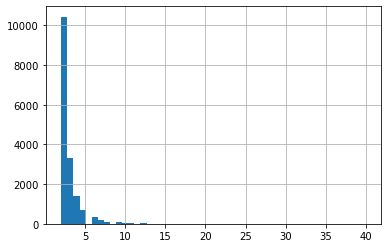

In [71]:
#histogram to see how many have been readmitted at least once
patient_encounters[patient_encounters>1].hist(bins=50)
#By seeing this graph, we cam infer that the most times a patient has been 
#readmitted is around 2~3 times

As you can see above , we are around 10000 entries which comprise approximately 10 percent of the total data with 2 readmittance.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.seaborn.catplot function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

In [72]:
#Importing seaborn
import seaborn as sns

Just by seeing this graph and the colors that depicts readmitted, we can visuualize that 
1) the age group [0-10) have very few admits and readmits compared to the other age groups.
2) the age group [50-60) have many readmits within 30 days when their time in hospital is around 7~9 days.
3) the age groups [60-80) have many readmits after a span of 30 days

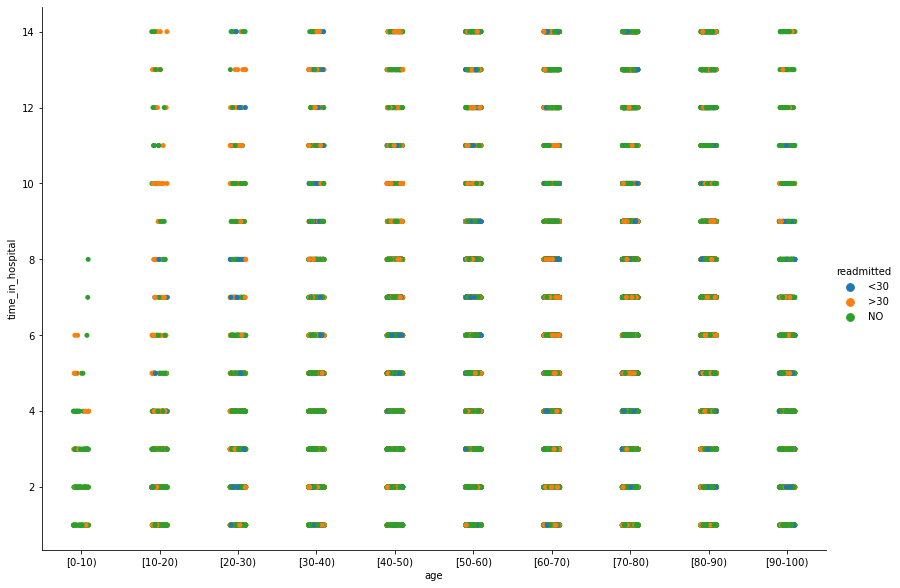

In [74]:
#time in hospital vs age wrt readmitted
sns.catplot(x="age", y="time_in_hospital",hue="readmitted", data=newData, height=8.27, aspect=11.7/8.27)


Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables. This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use. Here we have used kind="box" giving us box plots. Unlike using axes level functions directly, data must be passed in long form DataFrame with variables specified by passing string to x, y, hue.

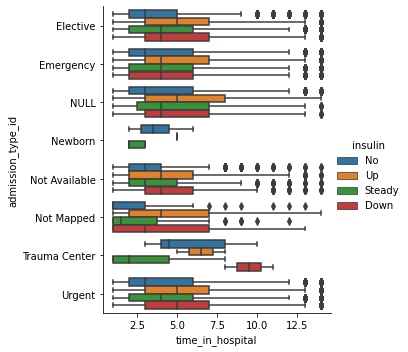

In [75]:
sns.catplot(x="time_in_hospital", y="admission_type_id", hue="insulin", kind="box", data=newData)

A surprising result we get from this bar plot is number of people getting readmitted after 30 days is more than people getting readmitted within 30 days. Ofcourse the number of people who don't need readmittance is higher than both but it is interesting to see that diabetic patients experience tend to take more than 30 days to experience any symptoms which lead them to readmittance.

Text(0.5, 1.0, 'Readmittance')

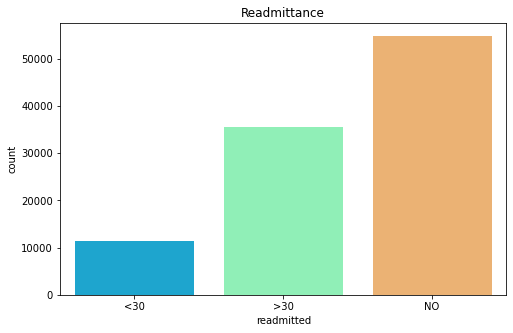

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='readmitted',data=newData, palette='rainbow')
plt.title("Readmittance") 
#categories of readmitted vs count

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.
Input data can be passed in a variety of formats, including:
Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.
1) A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
2) A “wide-form” DataFrame, such that each numeric column will be plotted.
3) An array or list of vectors.

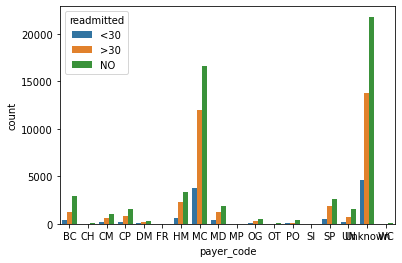

In [77]:
plot006 = sns.countplot(x="payer_code", hue="readmitted", data=newData)
sns.set(rc={'figure.figsize':(18,8)})
#count of payer codes based on readmitted

Below count plot helps us understand that patients who were admitted under the Emergency Category were the most frequent ones to get readmitted. The ratio that most of the patients are being readmitted after 30 days than before 30 days.

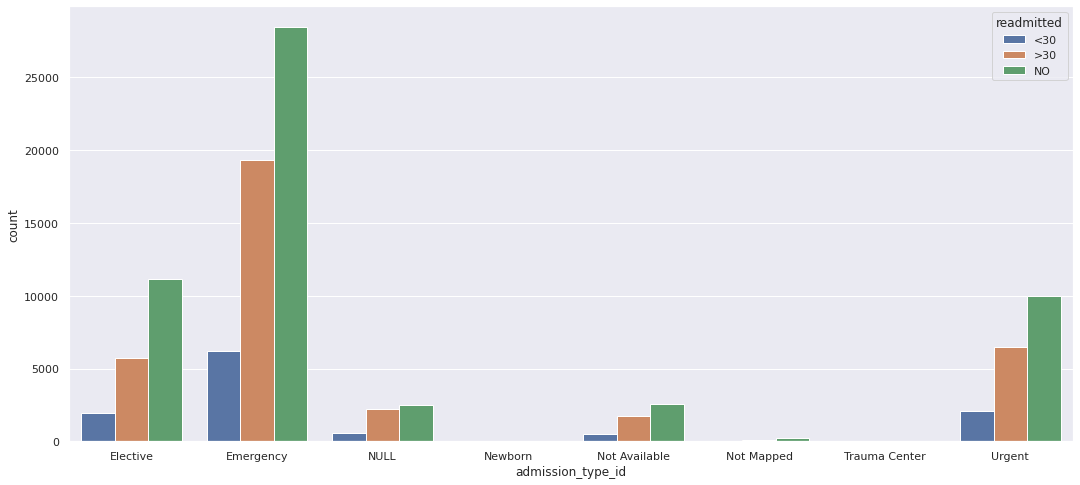

In [78]:
plot006 = sns.countplot(x="admission_type_id", hue="readmitted", data=newData)
sns.set(rc={'figure.figsize':(18,8)})
#counts of admission types based on readmitted categories

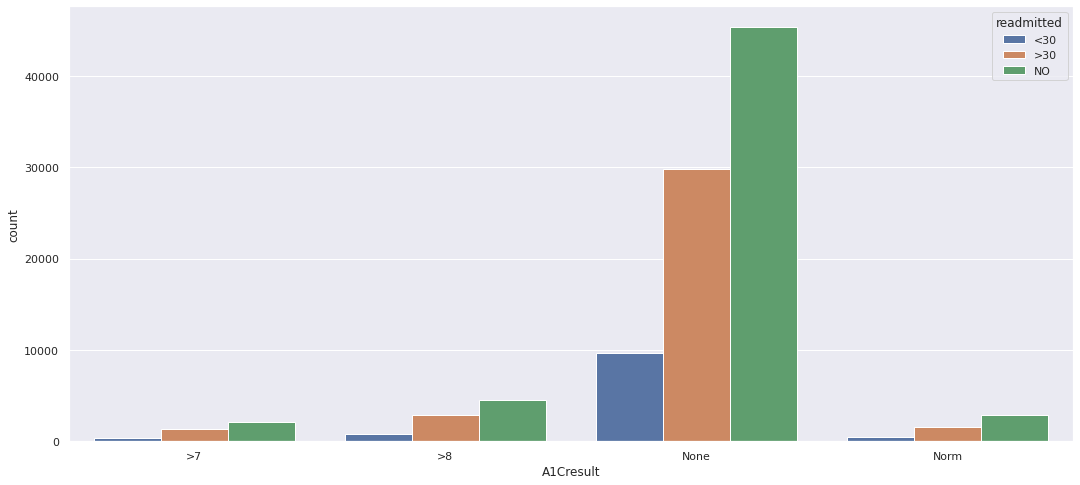

In [79]:
plot006 = sns.countplot(x="A1Cresult", hue="readmitted", data=newData)
sns.set(rc={'figure.figsize':(18,8)})
#Count of Alcoholic test results based on readmitted categories

Violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:
1) Median (a white dot on the violin plot)
2) Interquartile range (the black bar in the center of violin)
3) The lower/upper adjacent values

<AxesSubplot:xlabel='time_in_hospital', ylabel='num_procedures'>

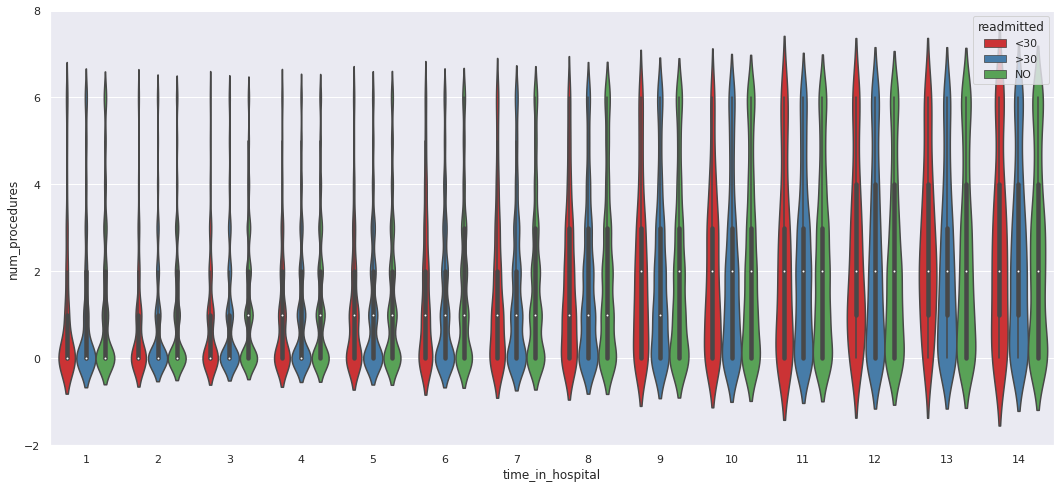

In [80]:
sns.violinplot(x="time_in_hospital",y="num_procedures",data=newData,hue='readmitted',palette='Set1')
#violin plot based on time in hospital vs number of procedures performed based on readmitted categories

readmitted   <30    >30     NO
insulin                       
Down        1698   4752   5768
No          4756  15949  26678
Steady      3433  10482  16934
Up          1470   4362   5484


<AxesSubplot:xlabel='insulin'>

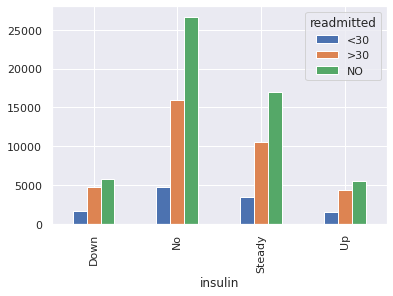

In [81]:
CrosstabResult=pd.crosstab(index=newData['insulin'],columns=newData['readmitted'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
%matplotlib inline 
CrosstabResult.plot.bar()
#bar plot based on insulin categories 

### $\color{dodgerblue}{\text{Which age group patients have a particular result of the glucose serum test?}}$ 

Using value_counts() we are understanding that as the age increases , max glucose serum level also increases. For example for someone in age group 20-30, we have only 43 people with glucose level above 300 and 14 people with glucose level above 200. While in the age group 70-80, we have 439 people with glucose level above 200 and 311 people with glucose level above 300.

In [82]:
newData.groupby(['age'])['max_glu_serum'].value_counts() 
#age group of patients based on their glucose serum test results

age           
[0-10)    None      161
          >200        0
          >300        0
          Norm        0
[10-20)   None      676
          >300       12
          >200        2
          Norm        1
[20-30)   None     1589
          >300       43
          >200       14
          Norm       11
[30-40)   None     3600
          Norm       75
          >300       71
          >200       29
[40-50)   None     9189
          Norm      205
          >300      176
          >200      115
[50-60)   None    16537
          Norm      324
          >200      209
          >300      186
[60-70)   None    21525
          Norm      482
          >200      250
          >300      226
[70-80)   None    24510
          Norm      808
          >200      439
          >300      311
[80-90)   None    16048
          Norm      582
          >200      364
          >300      203
[90-100)  None     2585
          Norm      109
          >200       63
          >300       36
Name: max_glu_serum, dtyp

$\color{dodgerblue}{\text{Which age group of patients have a particular result of the alcohol test?}}$ 

The patients with the age group 70-80 have the worse results from the alcohol test for diabetes

In [83]:
newData.groupby(['age'])['A1Cresult'].value_counts() 
#age group of patients based on their alcoholic test results

age           
[0-10)    >8         82
          None       68
          Norm        9
          >7          2
[10-20)   None      341
          >8        280
          Norm       56
          >7         14
[20-30)   None     1209
          >8        334
          Norm       84
          >7         30
[30-40)   None     2881
          >8        600
          Norm      202
          >7         92
[40-50)   None     7489
          >8       1289
          Norm      576
          >7        331
[50-60)   None    13871
          >8       1834
          Norm      928
          >7        623
[60-70)   None    18939
          >8       1684
          Norm      994
          >7        866
[70-80)   None    22522
          >8       1330
          Norm     1174
          >7       1042
[80-90)   None    14955
          Norm      843
          >7        706
          >8        693
[90-100)  None     2473
          Norm      124
          >7        106
          >8         90
Name: A1Cresult, dtype: i

$\color{dodgerblue}{\text{What is the count of the time in hospital for a particular admission type?}}$ 

We previously found that people who were admitted under Emergency were readmitted the most times. Thus we are looking at the people who were Admitted under Emergency Category. People who were readmitted to the hospital 

In [84]:
newData[newData['admission_type_id']=='Emergency'].time_in_hospital.value_counts()   
#count of time in hospital for emergency admission

2     9682
3     9611
4     7642
1     6749
5     5462
6     3966
7     3075
8     2224
9     1577
10    1231
11     916
12     748
13     607
14     500
Name: time_in_hospital, dtype: int64

In [85]:
newData[newData['admission_type_id']=='Urgent'].time_in_hospital.value_counts()
#count of time in hospital for urgent admission

3     3057
2     3004
4     2456
1     2356
5     1805
6     1458
7     1211
8      877
9      597
10     489
11     426
12     267
13     250
14     227
Name: time_in_hospital, dtype: int64

In [86]:
newData[newData['admission_type_id']=='Trauma Center'].time_in_hospital.value_counts()
#count of time in hospital for Trauma center admission

1     4
3     3
8     3
5     2
2     2
4     2
10    1
11    1
7     1
6     1
9     1
Name: time_in_hospital, dtype: int64

$\color{dodgerblue}{\text{Which age group of a patient has a greater probability of readmittance to the hospital?}}$ 

In [87]:
not_readmitted=newData[newData['readmitted']=='NO']
not_readmitted['age'].value_counts()
#age groups and their non-readmitted counts

[70-80)     13524
[60-70)     12084
[50-60)      9671
[80-90)      8896
[40-50)      5380
[30-40)      2164
[90-100)     1675
[20-30)       911
[10-20)       427
[0-10)        132
Name: age, dtype: int64

<AxesSubplot:>

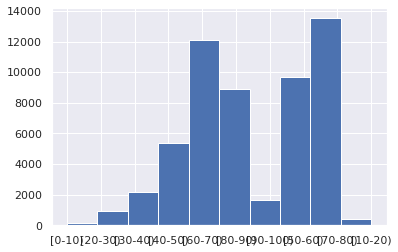

In [88]:
not_readmitted['age'].hist()

In [89]:
readmitted_lesser_than_30days=newData[newData['readmitted']=='<30']
readmitted_lesser_than_30days['age'].value_counts()
#age groups and their readmitted lesser than 30 days counts

[70-80)     3069
[60-70)     2502
[80-90)     2078
[50-60)     1668
[40-50)     1027
[30-40)      424
[90-100)     310
[20-30)      236
[10-20)       40
[0-10)         3
Name: age, dtype: int64

<AxesSubplot:>

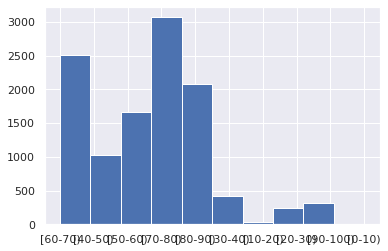

In [90]:
readmitted_lesser_than_30days['age'].hist()

In [91]:
readmitted_after_30days=newData[newData['readmitted']=='>30']
readmitted_after_30days['age'].value_counts()
#age groups and their readmitted after 30 days counts

[70-80)     9475
[60-70)     7897
[80-90)     6223
[50-60)     5917
[40-50)     3278
[30-40)     1187
[90-100)     808
[20-30)      510
[10-20)      224
[0-10)        26
Name: age, dtype: int64

<AxesSubplot:>

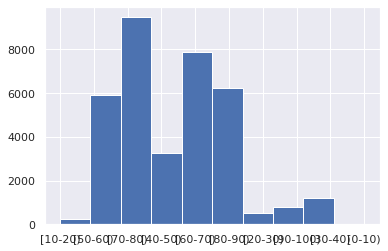

In [92]:
readmitted_after_30days['age'].hist()

$\color{dodgerblue}{\text{Which age group has been readmitted the most times for a particular value of Diabetes medication?}}$ 

In [93]:
newData.groupby(['diabetesMed','age'])['readmitted'].value_counts()  
#grouping diabetes medicine and age to get readmitted count

diabetesMed  age          
No           [0-10)    NO        25
                       >30        3
                       <30        0
             [10-20)   NO        63
                       >30       25
                       <30        3
             [20-30)   NO       209
                       >30      100
                       <30       33
             [30-40)   NO       597
                       >30      243
                       <30       86
             [40-50)   NO      1386
                       >30      686
                       <30      208
             [50-60)   NO      2329
                       >30     1203
                       <30      323
             [60-70)   NO      2835
                       >30     1537
                       <30      500
             [70-80)   NO      3387
                       >30     1869
                       <30      621
             [80-90)   NO      2555
                       >30     1328
                       <30      400
 

$\color{dodgerblue}{\text{Which age group has been readmitted the most times for a particular value of change in medication?}}$ 

The Ch signifies there was a change in the medication and the No signifies there wasn't a change. Furthermore the Readmittance is also calculated in which NO means a person was not readmitted. >30 means that person was readmitted within 30 days and <30 means the patient was readmitted after 30 days.

In [94]:
newData.groupby(['change','age'])['readmitted'].value_counts()
#grouping change in medication and age to get readmitted count

change  age          
Ch      [0-10)    NO       23
                  >30       9
                  <30       1
        [10-20)   NO      166
                  >30      98
                  <30      16
        [20-30)   NO      422
                  >30     268
                  <30     156
        [30-40)   NO      967
                  >30     594
                  <30     210
        [40-50)   NO     2478
                  >30    1708
                  <30     543
        [50-60)   NO     4478
                  >30    2972
                  <30     819
        [60-70)   NO     5669
                  >30    3967
                  <30    1236
        [70-80)   NO     5892
                  >30    4500
                  <30    1440
        [80-90)   NO     3485
                  >30    2837
                  <30     992
        [90-100)  NO      601
                  >30     319
                  <30     145
No      [0-10)    NO      109
                  >30      17
                  

$\color{dodgerblue}{\text{Creating model to check which values are most relevant to readmittance}}$ 

Based upon our analysis above , we selected the columns age,max_glu_srum,A1Cresult,insulin,change,diabetesMed which would be the most important in predicting the readmittance conditions. Thus we take a subset of our initial Dataframe to make a new Dataframe with the above mentioned columns and readmitted column.

In [95]:
#picking particular columns to use for fpgrowth algorithm
modelData = newData[['age','max_glu_serum', 'A1Cresult', 'insulin','change','diabetesMed','readmitted']].copy()
modelData.head()

,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,[0-10),None,None,No,No,No,NO
1,[10-20),None,None,Up,Ch,Yes,>30
2,[20-30),None,None,No,No,Yes,NO
3,[30-40),None,None,Up,Ch,Yes,NO
4,[40-50),None,None,Steady,Ch,Yes,NO


We used one hot encoding to convert the newly created dataframe into one-hot encoders. There are many approaches to using the associate data mining but all of them need to convert the data into a format of transactions or we can also say , convert them into Factors. Using one-hot encoding, we didn't have to write a separate code which iterates the columns we selected for this very purpose. Even if we did that, it costs a lot of processing power and one-hot encoding makes it easier in that manner

In [96]:
#hot encoding data
modelData_hotencoded = pd.get_dummies(modelData)

In [97]:
modelData_hotencoded.head()

,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),...,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


MLxtend is a library that implements a variety of core algorithms and utilities for machine learning and data mining. ... The sequential feature selection algorithms cover forward, backward, forward floating, and backward floating selection and leverage scikit-learn's cross-validation API. You can install the MLxtend package through the Python Package Index (PyPi) by running pip install mlxtend.

In [98]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 6.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [99]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [100]:
frequent_itemsets = fpgrowth(modelData_hotencoded, min_support=0.06, use_colnames=True)
frequent_itemsets
#Using fpgrowth algorithm for association rule mining

,support,itemsets
0,0.947468,(max_glu_serum_None)
1,0.832773,(A1Cresult_None)
2,0.539119,(readmitted_NO)
3,0.538048,(change_No)
4,0.465607,(insulin_No)
...,...,...
442,0.085864,"(insulin_Down, max_glu_serum_None, A1Cresult_N..."
443,0.085864,"(A1Cresult_None, insulin_Down, max_glu_serum_N..."
444,0.078995,"(A1Cresult_>8, max_glu_serum_None)"
445,0.072844,"(A1Cresult_>8, diabetesMed_Yes)"


In [101]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
#rules for a minimum confidence of 0.7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(max_glu_serum_None),(A1Cresult_None),0.947468,0.832773,0.783169,0.826592,0.992578,-0.005857,0.964354
1,(A1Cresult_None),(max_glu_serum_None),0.832773,0.947468,0.783169,0.940435,0.992578,-0.005857,0.881935
2,(readmitted_NO),(max_glu_serum_None),0.539119,0.947468,0.512106,0.949894,1.002561,0.001308,1.048429
3,(readmitted_NO),(A1Cresult_None),0.539119,0.832773,0.445355,0.826079,0.991962,-0.003609,0.961510
4,(readmitted_NO),(diabetesMed_Yes),0.539119,0.770031,0.402237,0.746099,0.968921,-0.012902,0.905743
...,...,...,...,...,...,...,...,...,...
993,(A1Cresult_>8),(max_glu_serum_None),0.080734,0.947468,0.078995,0.978457,1.032707,0.002502,2.438448
994,(A1Cresult_>8),(diabetesMed_Yes),0.080734,0.770031,0.072844,0.902264,1.171724,0.010676,2.352955
995,"(A1Cresult_>8, max_glu_serum_None)",(diabetesMed_Yes),0.078995,0.770031,0.071743,0.908198,1.179429,0.010914,2.505039
996,"(A1Cresult_>8, diabetesMed_Yes)",(max_glu_serum_None),0.072844,0.947468,0.071743,0.984891,1.039499,0.002726,3.476980


In [102]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules
#rules for a minimum threshold of 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(max_glu_serum_None),(readmitted_NO),0.947468,0.539119,0.512106,0.540500,1.002561,0.001308,1.003005
1,(readmitted_NO),(max_glu_serum_None),0.539119,0.947468,0.512106,0.949894,1.002561,0.001308,1.048429
2,"(diabetesMed_Yes, readmitted_NO)",(max_glu_serum_None),0.402237,0.947468,0.382829,0.951752,1.004521,0.001723,1.088788
3,(max_glu_serum_None),"(diabetesMed_Yes, readmitted_NO)",0.947468,0.402237,0.382829,0.404055,1.004521,0.001723,1.003052
4,(change_No),(A1Cresult_None),0.538048,0.832773,0.464074,0.862515,1.035714,0.016002,1.216326
...,...,...,...,...,...,...,...,...,...
2869,"(A1Cresult_>8, diabetesMed_Yes)",(max_glu_serum_None),0.072844,0.947468,0.071743,0.984891,1.039499,0.002726,3.476980
2870,"(max_glu_serum_None, diabetesMed_Yes)",(A1Cresult_>8),0.731384,0.080734,0.071743,0.098092,1.215001,0.012695,1.019246
2871,(A1Cresult_>8),"(max_glu_serum_None, diabetesMed_Yes)",0.080734,0.731384,0.071743,0.888632,1.215001,0.012695,2.411968
2872,(max_glu_serum_None),"(A1Cresult_>8, diabetesMed_Yes)",0.947468,0.072844,0.071743,0.075721,1.039499,0.002726,1.003113


In [103]:
rule1 = rules[rules['consequents'] == {'readmitted_NO'}]
#the antecedents when consequents is 'readmitted_NO'

In [104]:
rule1
#displaying all the rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(max_glu_serum_None),(readmitted_NO),0.947468,0.539119,0.512106,0.540500,1.002561,0.001308,1.003005
6,(change_No),(readmitted_NO),0.538048,0.539119,0.301505,0.560369,1.039416,0.011433,1.048335
12,"(change_No, max_glu_serum_None)",(readmitted_NO),0.508677,0.539119,0.286078,0.562396,1.043176,0.011840,1.053192
18,"(change_No, A1Cresult_None)",(readmitted_NO),0.464074,0.539119,0.257846,0.555614,1.030597,0.007655,1.037119
24,"(change_No, max_glu_serum_None, A1Cresult_None)",(readmitted_NO),0.436757,0.539119,0.243313,0.557090,1.033335,0.007849,1.040576
60,(insulin_No),(readmitted_NO),0.465607,0.539119,0.262150,0.563029,1.044350,0.011133,1.054717
88,"(insulin_No, max_glu_serum_None)",(readmitted_NO),0.440520,0.539119,0.248865,0.564934,1.047884,0.011372,1.059336
94,"(insulin_No, A1Cresult_None)",(readmitted_NO),0.404821,0.539119,0.226814,0.560284,1.039257,0.008568,1.048132
100,"(insulin_No, change_No)",(readmitted_NO),0.378260,0.539119,0.214639,0.567439,1.052530,0.010712,1.065470
106,"(insulin_No, max_glu_serum_None, A1Cresult_None)",(readmitted_NO),0.381768,0.539119,0.214354,0.561478,1.041474,0.008536,1.050988


In [105]:
rule1.loc[rule1['lift'].idxmax()]
#best conditions for readmitted_NO

antecedents           (diabetesMed_No, max_glu_serum_None)
consequents                                (readmitted_NO)
antecedent support                                0.216084
consequent support                                0.539119
support                                           0.129277
confidence                                        0.598272
lift                                              1.109721
leverage                                          0.012782
conviction                                        1.147246
Name: 440, dtype: object

In [106]:
rule2 = rules[rules['consequents'] == {'readmitted_>30'}]
#the antecedents when consequents is 'readmitted_>30'

In [107]:
rule2
#displaying the rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
909,(A1Cresult_None),(readmitted_>30),0.832773,0.349282,0.292288,0.350982,1.004867,0.001416,1.002619
911,(diabetesMed_Yes),(readmitted_>30),0.770031,0.349282,0.278266,0.361370,1.034608,0.009308,1.018928
913,(change_Ch),(readmitted_>30),0.461952,0.349282,0.169723,0.367403,1.051883,0.008371,1.028647
914,"(max_glu_serum_None, A1Cresult_None)",(readmitted_>30),0.783169,0.349282,0.274630,0.350665,1.003960,0.001083,1.002130
918,"(max_glu_serum_None, diabetesMed_Yes)",(readmitted_>30),0.731384,0.349282,0.264008,0.360970,1.033464,0.008549,1.018291
923,"(A1Cresult_None, diabetesMed_Yes)",(readmitted_>30),0.630319,0.349282,0.229458,0.364035,1.042238,0.009299,1.023198
927,"(max_glu_serum_None, diabetesMed_Yes, A1Cresul...",(readmitted_>30),0.593410,0.349282,0.216084,0.364139,1.042537,0.008817,1.023366
936,"(change_Ch, diabetesMed_Yes)",(readmitted_>30),0.461952,0.349282,0.169723,0.367403,1.051883,0.008371,1.028647
942,"(max_glu_serum_None, change_Ch)",(readmitted_>30),0.438791,0.349282,0.160948,0.366798,1.050150,0.007686,1.027663
947,"(A1Cresult_None, change_Ch)",(readmitted_>30),0.368699,0.349282,0.136097,0.369127,1.056816,0.007317,1.031456


In [108]:
rule2.loc[rule2['lift'].idxmax()]
#best conditions for readmitted>30

antecedents           (age_[70-80), A1Cresult_None, diabetesMed_Yes)
consequents                                         (readmitted_>30)
antecedent support                                          0.169526
consequent support                                          0.349282
support                                                      0.06398
confidence                                                  0.377406
lift                                                        1.080519
leverage                                                    0.004768
conviction                                                  1.045172
Name: 2424, dtype: object

In [109]:
rule3 = rules[rules['consequents'] == {'readmitted_<30'}]
#the antecedents when consequents is 'readmitted_<30'

In [110]:
rule3
#displaying the rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2744,(A1Cresult_None),(readmitted_<30),0.832773,0.111599,0.095130,0.114233,1.023599,0.002193,1.002973
2747,(diabetesMed_Yes),(readmitted_<30),0.770031,0.111599,0.089529,0.116267,1.041823,0.003594,1.005282
2748,"(max_glu_serum_None, A1Cresult_None)",(readmitted_<30),0.783169,0.111599,0.088988,0.113626,1.018163,0.001587,1.002287
2753,"(max_glu_serum_None, diabetesMed_Yes)",(readmitted_<30),0.731384,0.111599,0.084547,0.115599,1.035837,0.002925,1.004522
2757,"(A1Cresult_None, diabetesMed_Yes)",(readmitted_<30),0.630319,0.111599,0.075428,0.119666,1.072287,0.005085,1.009164
2763,"(max_glu_serum_None, diabetesMed_Yes, A1Cresul...",(readmitted_<30),0.593410,0.111599,0.070642,0.119045,1.066718,0.004418,1.008452


In [111]:
rule3.loc[rule3['lift'].idxmax()]
#best conditions for readmitted<30

antecedents           (A1Cresult_None, diabetesMed_Yes)
consequents                            (readmitted_<30)
antecedent support                             0.630319
consequent support                             0.111599
support                                        0.075428
confidence                                     0.119666
lift                                           1.072287
leverage                                       0.005085
conviction                                     1.009164
Name: 2757, dtype: object